In [1]:
import pandas as pd
import numpy as np
from tkinter import *
from tkinter import filedialog
import os
from matplotlib import pyplot as plt
import xml.etree.ElementTree
import seaborn as sns
import _2D_Utils
import matplotlib
from scipy.signal import *

Matplotlib is building the font cache; this may take a moment.


In [2]:
# tkinter setup
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
%gui tk

In [3]:
# Camera constants
num_pixels = 1024
nm_per_pixel = 0.125
nm_in_half = (num_pixels/2) * nm_per_pixel

In [4]:
xml_file, data_file = _2D_Utils.get_files()
xml_tree = _2D_Utils.get_tree(xml_file)
xml_root = xml_tree.getroot()

In [5]:
# Get scan settings
scan_start, scan_stop, scan_step, nsteps, offset = _2D_Utils.get_params(xml_root)

# Calculate graph center for y-axis, along with min and max (in nm)
fluor_center = _2D_Utils.get_center(scan_start, offset)
fluor_min = fluor_center + nm_in_half
fluor_max = fluor_center - nm_in_half

LIF_pts = np.linspace(scan_start, scan_stop, nsteps)
DF_pts = np.linspace(fluor_min, fluor_max, num_pixels)

# Load data from data_file
data_transposed, data_medfilt = _2D_Utils.read_data(data_file)

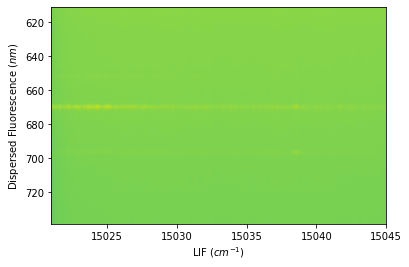

In [6]:
_2D_Utils.show_graph(data_medfilt, scan_start, scan_stop, fluor_min, fluor_max)

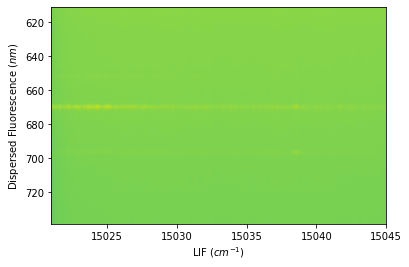

'C:/Users/STEIMLELAB/OneDrive - Emory University/Graduate School/Heaven Lab/Data/SmO/01June2022/15021.00-15045.00_0.01_20_01.jpg'

<Figure size 432x288 with 0 Axes>

In [7]:
_2D_Utils.save_image(data_medfilt, scan_start, scan_stop, fluor_min, fluor_max, data_file)

In [8]:
lif = _2D_Utils.LIF_slice(data_medfilt, DF_pts, 650, 670)

In [9]:
lif_peaks = _2D_Utils.get_peaks(lif, 300)

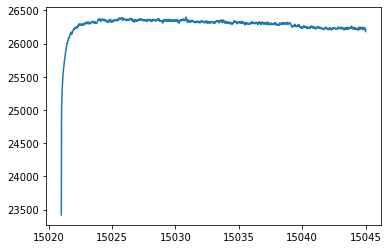

In [11]:
plt.plot(LIF_pts, lif)
for peak in lif_peaks[0]:
    plt.axvline(x=LIF_pts[peak], color='r', linestyle=':')

In [10]:
df = _2D_Utils.DF_slice(data_medfilt, LIF_pts, 15355, 15358)

C:\Users\cniel\source\repos\Heaven Lab Program Repo\_2D_Utils.py:69: RuntimeWarning: Mean of empty slice.
  return data[:, np.where((LIF_pts >= min) & (LIF_pts <= max))].mean(axis=2).flatten()
C:\Users\cniel\Anaconda3\envs\Heaven_Lab\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [12]:
df_peaks = _2D_Utils.get_peaks(df, 500)

In [9]:
plt.plot(DF_pts, df)
for peak in df_peaks[0]:
    plt.axvline(x=DF_pts[peak], color='r', linestyle=':')

NameError: name 'df' is not defined

In [34]:
slices = _2D_Utils.auto_slice(data_medfilt, DF_pts, LIF_pts, 80, 400)
len(slices)

2

Text(0.5, 1.0, '737.717nm')

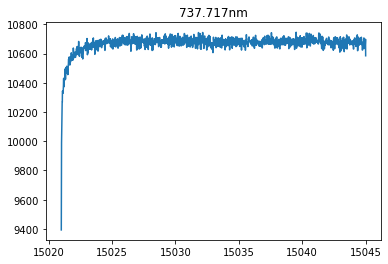

In [35]:
plt.plot(LIF_pts, slices[0][1])
for peak in slices[0][2]:
    plt.axvline(x=LIF_pts[peak], color='r', linestyle=':')
plt.title(f'{round(DF_pts[slices[0][0]], 3)}nm')

Text(0.5, 1.0, '679.536nm')

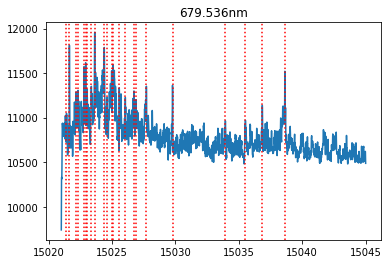

In [36]:
plt.plot(LIF_pts, slices[1][1])
for peak in slices[1][2]:
    plt.axvline(x=LIF_pts[peak], color='r', linestyle=':')
plt.title(f'{round(DF_pts[slices[1][0]], 3)}nm')

In [38]:
LIF_pts[slices[1][2][-1]]

15038.63